# Task 3:- Iris Flower Classification 

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#reading the dataset
iris=pd.read_csv('IRIS.csv')

In [5]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
iris.shape

(150, 5)

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# DATA INSPECTION

In [9]:
#collecting the information about data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
#Cheaking the missing values in the data
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

 Here are no missing values 

# DATA VISUALISATION

In [12]:
#COUNT PLOT FOR SPECIES FEATURE
iris['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

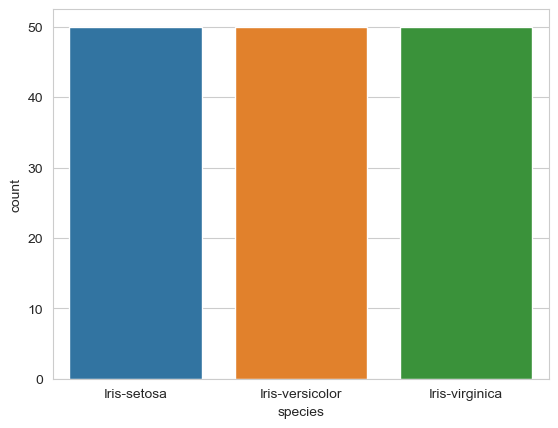

In [28]:
sns.countplot(x='species',data=iris);
plt.show()

C:\Users\chait\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


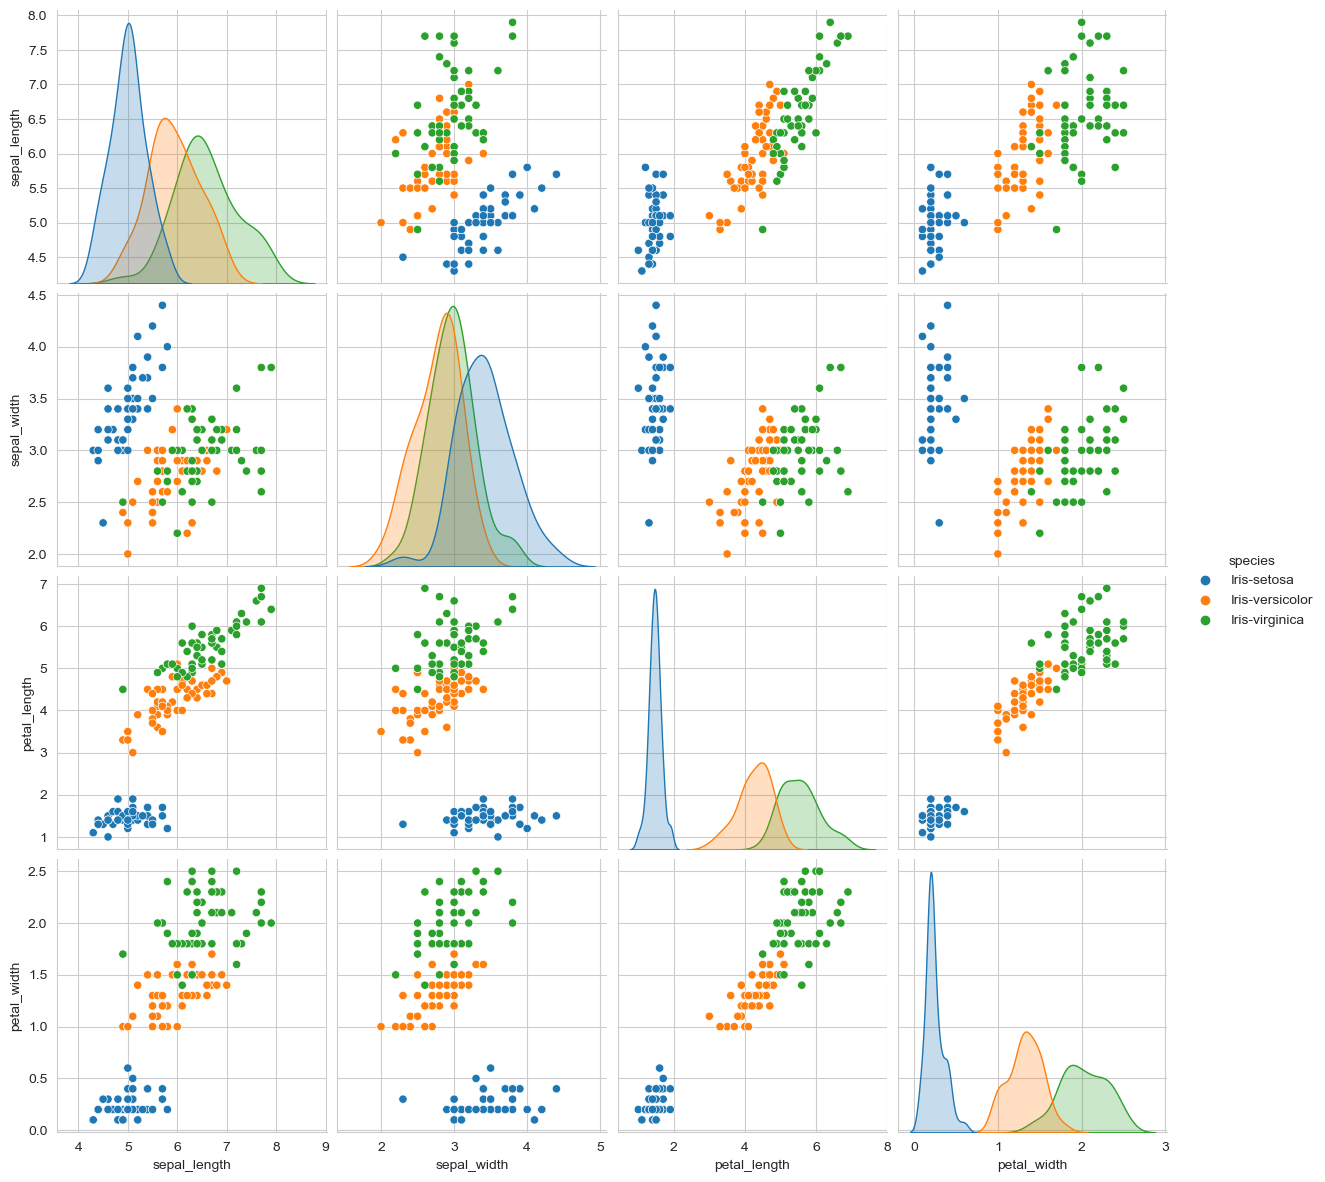

In [29]:
#visualize the whole dataset 
sns.set_style('whitegrid')
sns.pairplot(iris , hue='species' , height = 3);
plt.show()

C:\Users\chait\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\chait\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\chait\anaconda3\Lib\s

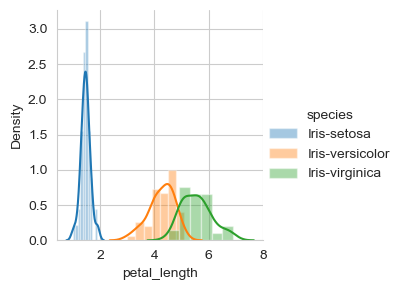

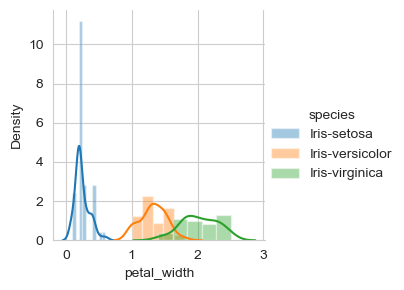

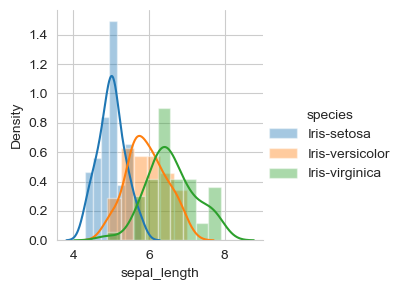

In [30]:
sns.FacetGrid(iris , hue = 'species').map(sns.distplot , "petal_length").add_legend()
sns.FacetGrid(iris , hue = 'species').map(sns.distplot , "petal_width").add_legend()
sns.FacetGrid(iris , hue = 'species').map(sns.distplot , "sepal_length").add_legend()
plt.show()

SEPERATING THE FEATURES AND TARGET VALUES

In [31]:
x= iris.values[ : , 0:4]
y= iris.values[ : , 4]

SPLITTING THE DATA INTO TRAINING AND TESTING DATA

In [32]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2)

# MODEL EVALUATION

In [33]:
#finding the optium number of clusters
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++',max_iter = 300, n_init = 10 , random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\chait\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\chait\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\chait\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\chait\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

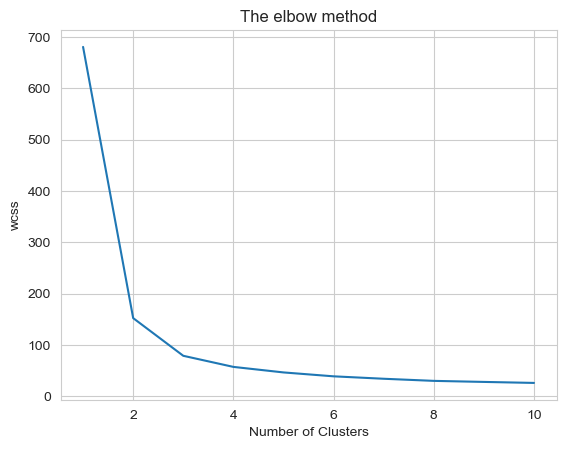

In [34]:
#Using wcss value to get elbow method and obtain number of clusters
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel("Number of Clusters")
plt.ylabel('wcss')#within cluster sum of squares
plt.show()

In [35]:
#Implementing k-means clustering
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300,n_init =10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

C:\Users\chait\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


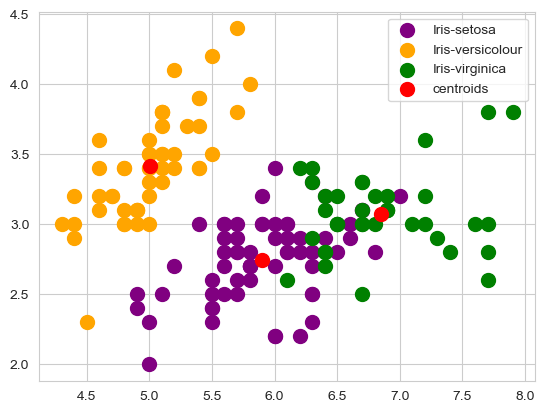

In [36]:
# visualising the clusters 
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],s = 100 , c = 'purple',label = "Iris-setosa")
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],s = 100 , c = 'orange',label = "Iris-versicolour")
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s = 100 , c = 'green',label = "Iris-virginica")

#Plotting the centrods of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100 , c="red" , label = 'centroids')
plt.legend()

# LOGISTIC REGRESSION

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train , y_train)

C:\Users\chait\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
prediction = model.predict(x_test)

In [39]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
print('Accuracy is : ', accuracy_score(y_test , prediction)*100)

Accuracy is :  96.66666666666667


CONCLUSION: BY USING THE FLOWER DATA-SET AND PERFOMING THE LOGISTIC REGRESSION ALGORITHM. WE FINALLY CALSSIFIED IRIS FLOWER INTO DIFFERENT SPECIES BASED ONT THEIR SEPAL ANS PETAL MEASUREMENTS.AND WE GOT AN ACCURACY OF 96.66% WHICH SHOWES THAT OUR MODEL IS VERY ACCURATE.